# Predict the price of Ice-Cream based on temperature

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# # Disable all warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load the DataSet


In [8]:
ice_cream_df = pd.read_csv("../DataSet/IceCreamData.csv")
ice_cream_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


### Data Pre-processing

In [9]:
ice_cream_df.isnull().sum()


Temperature    0
Revenue        0
dtype: int64

In [10]:
ice_cream_df.describe()


,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [11]:
ice_cream_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


### Data splitting


In [15]:
from sklearn.model_selection import train_test_split

y = ice_cream_df['Revenue']
X = ice_cream_df[['Temperature']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Model Training

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train,y_train)


LinearRegression()

In [17]:
# print the model intercept and coefficient
print('Linear Model Coefficient (m)', regressor.coef_)
print('Linear Model Coefficient (b)', regressor.intercept_)

Linear Model Coefficient (m) [21.32348237]
Linear Model Coefficient (b) 46.93318537295738


### Testing the model


In [22]:
y_predict = regressor.predict( X_test)
y_predict[:10]


array([479.0538143 , 492.56659271, 312.68640941, 396.76668411,
       653.90468157, 520.85018853, 569.82435185, 371.7151994 ,
       743.1435246 , 639.52457114])

In [23]:
y_test

96     474.749392
333    508.720471
58     303.734381
158    390.403349
280    607.839194
          ...    
312    575.176896
356    596.876750
70     276.787086
20     612.153949
487    793.079011
Name: Revenue, Length: 125, dtype: float64

### Model Evaluation

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 547.56
R-squared: 0.98
Mean Absolute Error: 18.11


In [25]:
# Predict revenue for a temperature

temperature_array = [[24.566884]]
predicted_revenue = regressor.predict(temperature_array)
print(predicted_revenue[0])

570.7847032830647


### Plotting the results

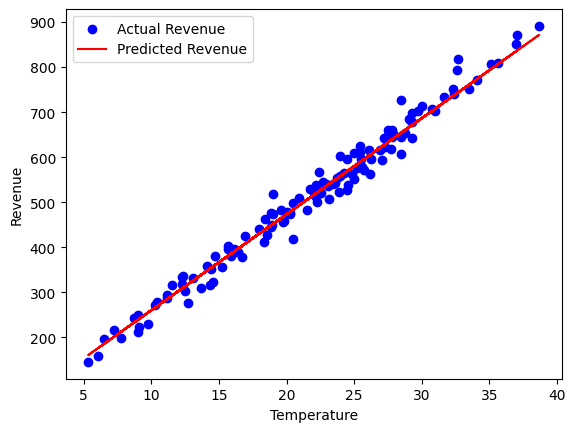

In [28]:
# Create a scatter plot
plt.scatter(X_test, y_test, color='blue', label='Actual Revenue')
plt.plot(X_test, y_predict, color='red', label='Predicted Revenue')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.legend()
plt.show()

### use a function to predict the revenue for a given temperature

In [36]:
# creating function above code

def predict_revenue(temperature):
    # Ensure the input is in the correct format (2D array)
    temperature_array = np.array([[temperature]])
    
    # Use the regressor to predict revenue
    predicted_revenue = regressor.predict(temperature_array)
    
    # Return the predicted revenue
    return predicted_revenue[0]

# Example usage
# Assuming you have a trained 'regressor' model already



In [35]:
temperature = 24.566884
predicted_revenue = predict_revenue(temperature)
print(f"Predicted revenue: {predicted_revenue}")

Predicted revenue: 570.7847032830647
